In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


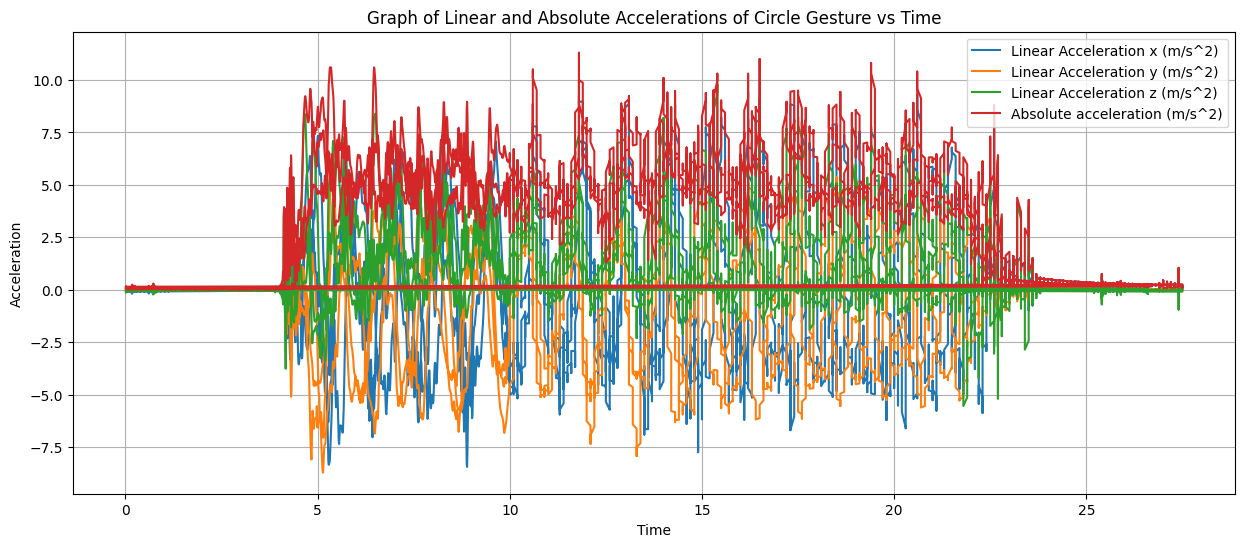

In [13]:
#Reading the csv file
df = pd.read_csv('/content/Circles_Data_N.csv')
df.describe()

# Plotting the initial graph
plt.figure(figsize=(15, 6))

# Plot each column against time
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='Linear Acceleration x (m/s^2)')
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='Linear Acceleration y (m/s^2)')
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.plot(df['Time (s)'], df['Absolute acceleration (m/s^2)'], label='Absolute acceleration (m/s^2)')

# Adding Labels
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Graph of Linear and Absolute Accelerations of Circle Gesture vs Time')

# For Legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

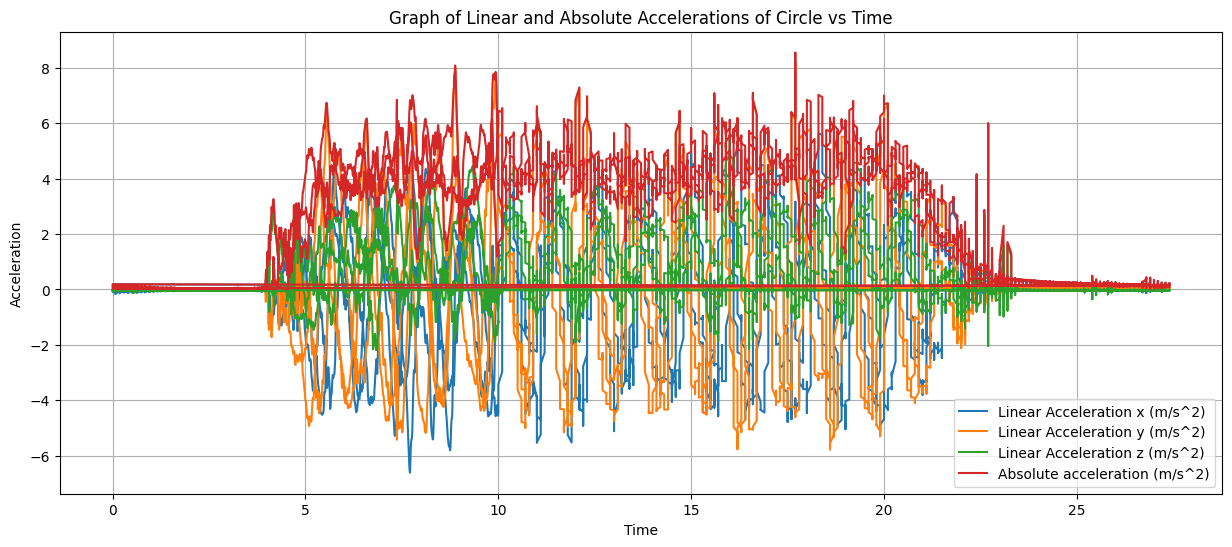

In [14]:
#Reading the csv file
df_G = pd.read_csv('/content/Circle_Final_Combined_G_csv.csv')
df_G.describe()


# Plotting the initial graph
plt.figure(figsize=(15, 6))

# Plot each column against time
plt.plot(df_G['Time (s)'], df_G['Linear Acceleration x (m/s^2)'], label='Linear Acceleration x (m/s^2)')
plt.plot(df_G['Time (s)'], df_G['Linear Acceleration y (m/s^2)'], label='Linear Acceleration y (m/s^2)')
plt.plot(df_G['Time (s)'], df_G['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.plot(df_G['Time (s)'], df_G['Absolute acceleration (m/s^2)'], label='Absolute acceleration (m/s^2)')

# Adding Labels
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Graph of Linear and Absolute Accelerations of Circle vs Time')

# For Legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

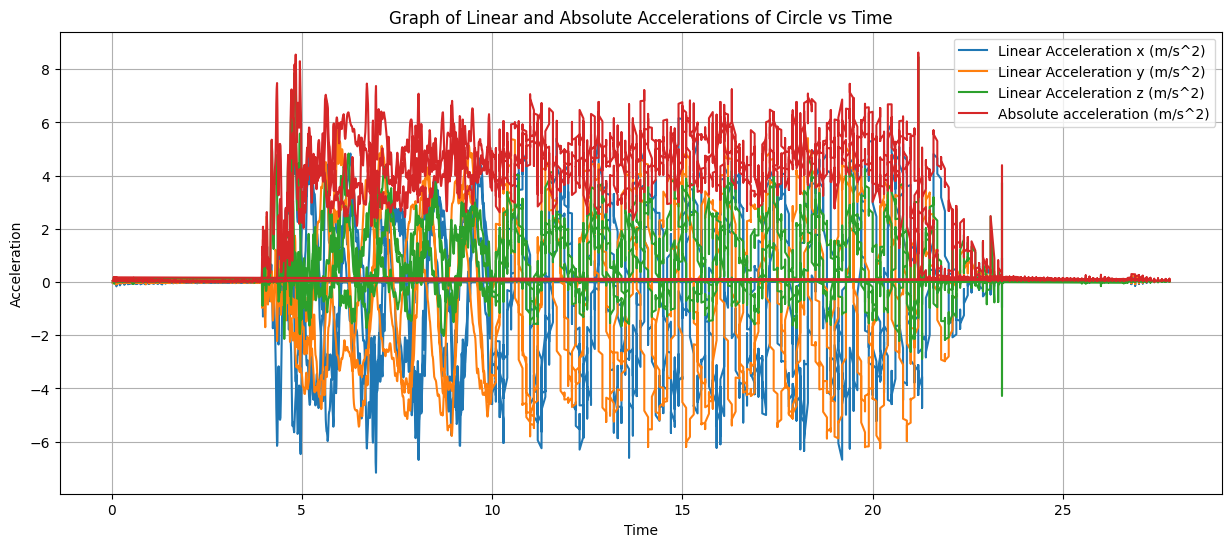

In [15]:
#Reading the csv file
df_A = pd.read_csv('/content/Circular_Data_A.csv')
df_A.describe()

# Plotting the initial graph
plt.figure(figsize=(15, 6))

# Plot each column against time
plt.plot(df_A['Time (s)'], df_A['Linear Acceleration x (m/s^2)'], label='Linear Acceleration x (m/s^2)')
plt.plot(df_A['Time (s)'], df_A['Linear Acceleration y (m/s^2)'], label='Linear Acceleration y (m/s^2)')
plt.plot(df_A['Time (s)'], df_A['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.plot(df_A['Time (s)'], df_A['Absolute acceleration (m/s^2)'], label='Absolute acceleration (m/s^2)')

# Adding Labels
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Graph of Linear and Absolute Accelerations of Circle vs Time')

# For Legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()



In [16]:
frames = ([df, df_G, df_A])
result = pd.concat(frames,ignore_index= True)
result.describe()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,24437.000000,24437.000000,24437.000000,24437.000000,24437.000000
mean,13.575993,-0.007662,-0.324367,0.847542,3.119079
std,7.832857,2.504142,2.469888,1.536209,2.413658
min,-0.000530,-8.450000,-8.730000,-5.550000,0.003780
25%,6.790000,-1.400000,-1.860000,-0.026800,0.206000
50%,13.600000,0.040800,0.008580,0.055500,3.790000
75%,20.400000,1.090000,0.745000,1.670000,4.880000
max,27.800000,9.430000,8.180000,9.790000,11.300000


Number of Rows: 24437
Number of Rows after trimming: 23585
start index:  405
end index: 23989
Start time of spike: 4.07
End time of spike: 23.4


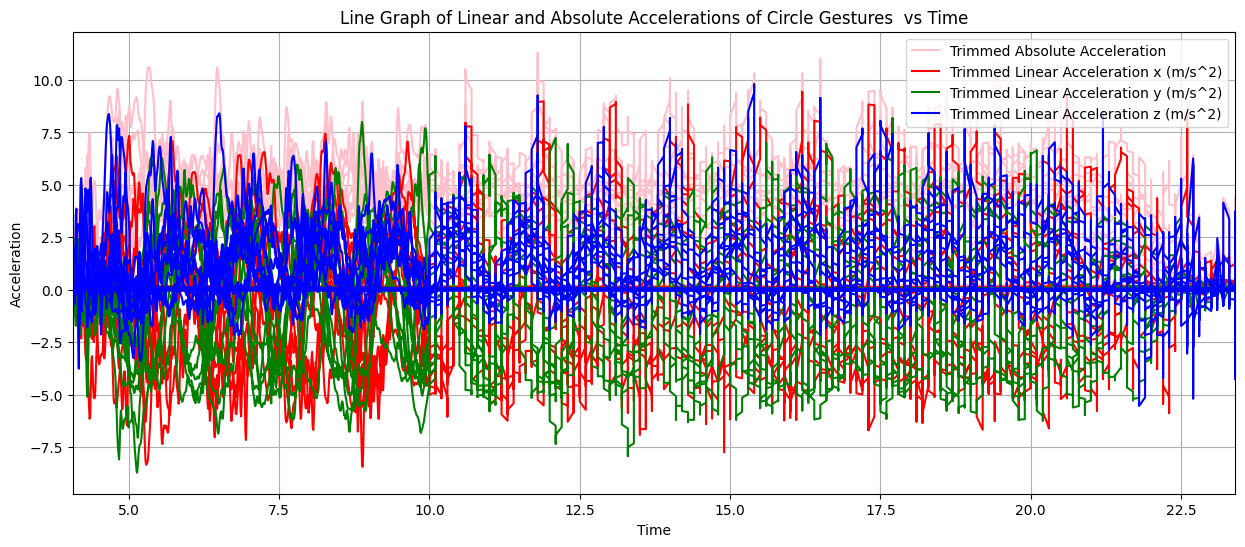

In [17]:
#data = pd.read_csv('GoAwayFinal_A.csv')
print('Number of Rows:', len(result))
# Step 2: Extract the columns for Time and Absolute Acceleration
time = result['Time (s)']
acceleration = result['Absolute acceleration (m/s^2)']

# Plotting the initial graph
plt.figure(figsize=(15, 6))

# Adding Labels
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Line Graph of Linear and Absolute Accelerations of Circle Gestures  vs Time')

# Detect the spike by setting a threshold
threshold = 0.3# Adjust this threshold based on your data and requirements

# Find the indices where the acceleration exceeds the threshold
spike_indices = result[result['Absolute acceleration (m/s^2)'] > threshold].index

# If there are spike indices, trim the data
if len(spike_indices) > 0:
    start_index = spike_indices[0]
    end_index = spike_indices[-1]
    trimmed_data = result.iloc[start_index:end_index+1]


    # Trim the data to keep only the time range around the spike
    print('Number of Rows after trimming:', len(trimmed_data))
    print('start index: ',start_index)
    print('end index:' , end_index)

    # Print start and end times of the spike
    print("Start time of spike:", trimmed_data.iloc[0]['Time (s)'])
    print("End time of spike:", trimmed_data.iloc[-1]['Time (s)'])
else:
    # If no spike is detected, keep the entire dataset
    trimmed_data = result

start_time = trimmed_data.loc[start_index, 'Time (s)']
end_time = trimmed_data.loc[end_index, 'Time (s)']
plt.xlim(start_time, end_time)

# Plot the trimmed data
plt.plot(trimmed_data['Time (s)'], trimmed_data['Absolute acceleration (m/s^2)'], color='pink',   label='Trimmed Absolute Acceleration')
plt.plot(trimmed_data['Time (s)'], trimmed_data['Linear Acceleration x (m/s^2)'], color = 'red',  label='Trimmed Linear Acceleration x (m/s^2)')
plt.plot(trimmed_data['Time (s)'], trimmed_data['Linear Acceleration y (m/s^2)'], color='green',  label='Trimmed Linear Acceleration y (m/s^2)')
plt.plot(trimmed_data['Time (s)'], trimmed_data['Linear Acceleration z (m/s^2)'], color = 'blue', label='Trimmed Linear Acceleration z (m/s^2)')

# Displaying the plot
plt.grid(True)
plt.legend()


In [18]:
circle_df = trimmed_data.assign(Gesture='Circle')
circle_df

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Gesture
405,4.07,0.07400,0.0895,-0.3320,0.352,Circle
406,4.08,0.00502,0.0807,-0.3870,0.395,Circle
407,4.09,0.26300,0.2040,-0.3210,0.463,Circle
408,4.10,0.36200,0.3230,-0.7040,0.856,Circle
409,4.11,0.31300,0.2870,-0.1320,0.445,Circle
...,...,...,...,...,...,...
23985,23.30,0.07180,0.1110,0.0657,0.148,Circle
23986,23.30,0.15400,0.1560,-0.0559,0.227,Circle
23987,23.30,0.03510,0.0115,0.1290,0.134,Circle
23988,23.30,0.03990,0.1240,-0.1010,0.165,Circle


In [20]:
output_file_path = r"C:\Users\91790\Documents\UoN\DSML\13 March\DataForWaveComeHereGoAway_A\circleCombined.csv"
circle_df.to_csv(output_file_path, index=False)

# Print the combined data
print(circle_df)

       Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  \
405        4.07                        0.07400                         0.0895   
406        4.08                        0.00502                         0.0807   
407        4.09                        0.26300                         0.2040   
408        4.10                        0.36200                         0.3230   
409        4.11                        0.31300                         0.2870   
...         ...                            ...                            ...   
23985     23.30                        0.07180                         0.1110   
23986     23.30                        0.15400                         0.1560   
23987     23.30                        0.03510                         0.0115   
23988     23.30                        0.03990                         0.1240   
23989     23.40                        0.23600                         0.1390   

       Linear Acceleration 